In [49]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [50]:
w = 0.3
b = 0.9

start = 0
end = 1
step = 0.01
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = w * X + b
len(X),len(y)

(100, 100)

In [51]:
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

In [52]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="g",s=4,label="Training data")
  plt.scatter(test_data,test_labels,c="b",s=4,label="Testing data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  plt.legend(prop={"size":14})

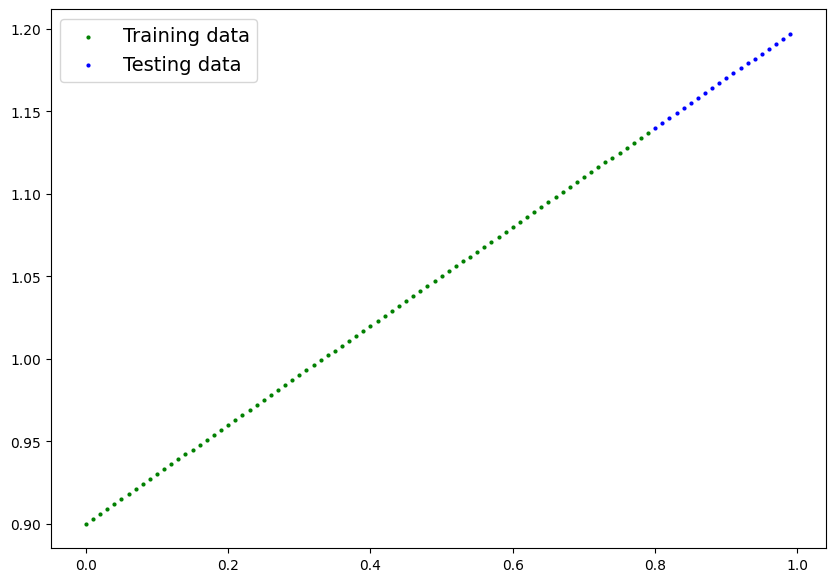

In [53]:
plot_predictions()

In [54]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weight * x + self.bias

In [55]:
model = LinearRegressionModel()
model.state_dict()

OrderedDict([('weight', tensor([0.2844])), ('bias', tensor([0.1738]))])

In [62]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)

In [63]:
epochs = 300
training_data_array = []
test_data_array = []
epoch_count = []

for epoch in range(epochs):
  model.train()
  y_pred = model(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if(epoch % 20 == 0):
    model.eval()
    with torch.inference_mode():
      test_pred = model(X_test)
      test_loss = loss_fn(test_pred,y_test)
    training_data_array.append(loss.detach().numpy())
    test_data_array.append(test_loss.detach().numpy())
    epoch_count.append(epoch)
    print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.03641645982861519 | MAE Test Loss: 0.08342050015926361 
Epoch: 20 | MAE Train Loss: 0.029562324285507202 | MAE Test Loss: 0.06812480837106705 
Epoch: 40 | MAE Train Loss: 0.022708188742399216 | MAE Test Loss: 0.052829086780548096 
Epoch: 60 | MAE Train Loss: 0.015856992453336716 | MAE Test Loss: 0.03650151938199997 
Epoch: 80 | MAE Train Loss: 0.009004817344248295 | MAE Test Loss: 0.020517904311418533 
Epoch: 100 | MAE Train Loss: 0.0021596283186227083 | MAE Test Loss: 0.00385306472890079 
Epoch: 120 | MAE Train Loss: 0.008872823789715767 | MAE Test Loss: 0.0003113269922323525 
Epoch: 140 | MAE Train Loss: 0.008872823789715767 | MAE Test Loss: 0.0003113269922323525 
Epoch: 160 | MAE Train Loss: 0.008872823789715767 | MAE Test Loss: 0.0003113269922323525 
Epoch: 180 | MAE Train Loss: 0.008872823789715767 | MAE Test Loss: 0.0003113269922323525 
Epoch: 200 | MAE Train Loss: 0.008872823789715767 | MAE Test Loss: 0.0003113269922323525 
Epoch: 220 | MAE Train Los

In [64]:
training_data_array,test_data_array,epoch_count

([array(0.03641646, dtype=float32),
  array(0.02956232, dtype=float32),
  array(0.02270819, dtype=float32),
  array(0.01585699, dtype=float32),
  array(0.00900482, dtype=float32),
  array(0.00215963, dtype=float32),
  array(0.00887282, dtype=float32),
  array(0.00887282, dtype=float32),
  array(0.00887282, dtype=float32),
  array(0.00887282, dtype=float32),
  array(0.00887282, dtype=float32),
  array(0.00887282, dtype=float32),
  array(0.00887282, dtype=float32),
  array(0.00887282, dtype=float32),
  array(0.00887282, dtype=float32)],
 [array(0.0834205, dtype=float32),
  array(0.06812481, dtype=float32),
  array(0.05282909, dtype=float32),
  array(0.03650152, dtype=float32),
  array(0.0205179, dtype=float32),
  array(0.00385306, dtype=float32),
  array(0.00031133, dtype=float32),
  array(0.00031133, dtype=float32),
  array(0.00031133, dtype=float32),
  array(0.00031133, dtype=float32),
  array(0.00031133, dtype=float32),
  array(0.00031133, dtype=float32),
  array(0.00031133, dtype=flo

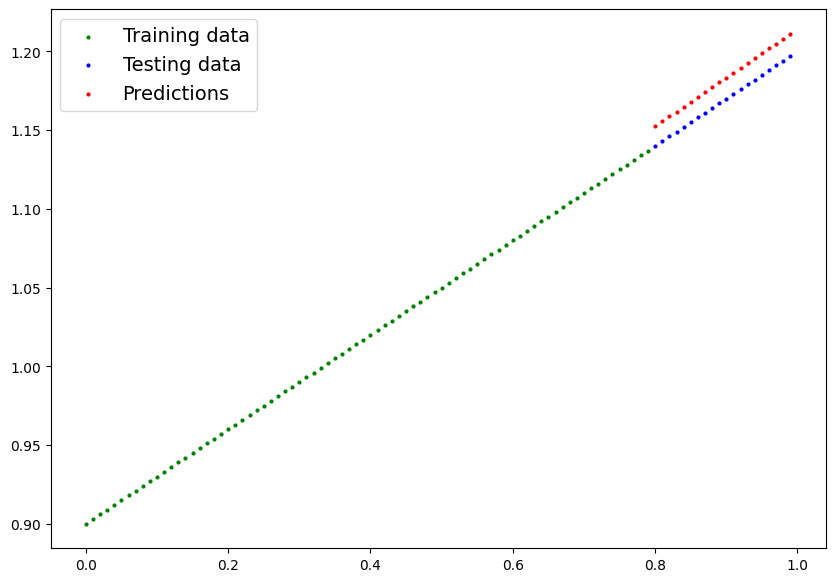

In [65]:
with torch.inference_mode():
  y_preds = model(X_test)
plot_predictions(predictions=y_preds)